In [7]:
%reload_ext autoreload
%autoreload 2

import models.NeuralNetwork as NeuralNetwork

import importlib
importlib.reload(NeuralNetwork)  # Reload module

from models.NeuralNetwork import TitanicSurvivalModel

Epoch 1/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5515 - f1_score: 0.5854 - loss: 0.8229 - precision: 0.4622 - val_accuracy: 0.7654 - val_f1_score: 0.4571 - val_loss: 0.5913 - val_precision: 1.0000
Epoch 2/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - f1_score: 0.5759 - loss: 0.6318 - precision: 0.6081 - val_accuracy: 0.8395 - val_f1_score: 0.4571 - val_loss: 0.5212 - val_precision: 1.0000
Epoch 3/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - f1_score: 0.5786 - loss: 0.6142 - precision: 0.6223 - val_accuracy: 0.8765 - val_f1_score: 0.4571 - val_loss: 0.4605 - val_precision: 1.0000
Epoch 4/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - f1_score: 0.5585 - loss: 0.5634 - precision: 0.6596 - val_accuracy: 0.8889 - val_f1_score: 0.4571 - val_loss: 0.4259 - val_precision: 0.9412
Epoch 5/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - f1_score: 0.5359 - loss: 0.5452 - precision: 0.6440 - val_accuracy: 0.8765 -

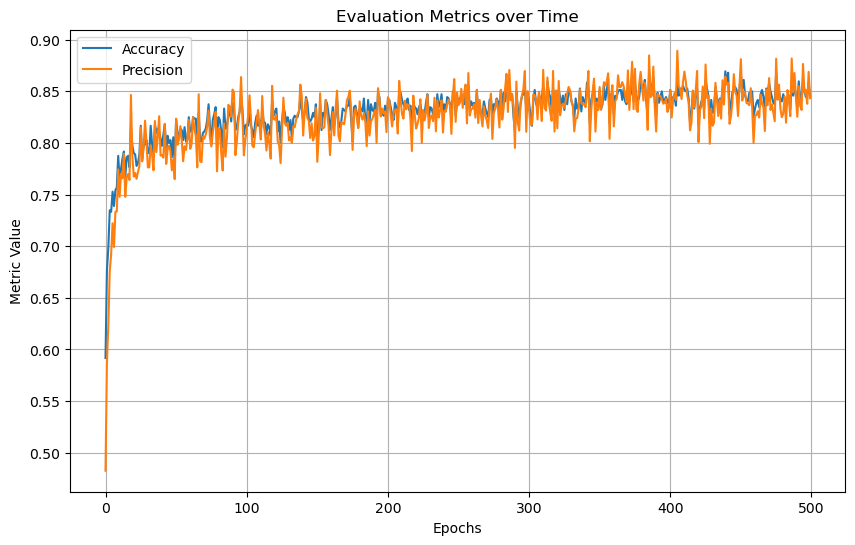

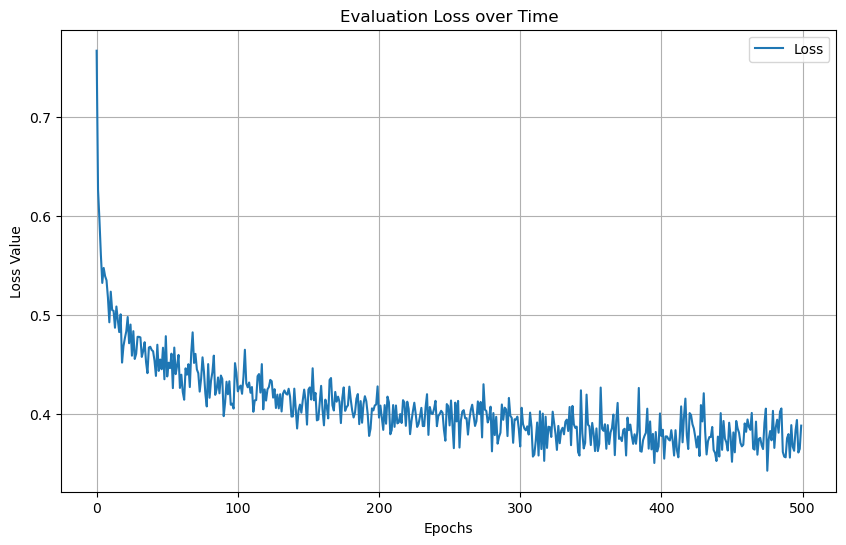

In [ ]:
model = TitanicSurvivalModel(dataset_path = 'data/dataset.csv',
                             epochs = 500,
                             batch_size = 32,
                             test_split = 0.2,
                             validation_split = 0.2,
                             learning_rate = 1e-3,
                            )

model.load_and_preprocess_data()
model.build_model()
model.train()
model.evaluate()
model.plot_metrics()
model.plot_loss()